In [1]:
"""This model was used to train the model due to its lightweight 
configuration but yielded poor results. So, we switched to the ResNet50 model which
produced some good results for our dataset""" 

In [ ]:
#Import all the necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D,Flatten,Dense
from tensorflow.keras.applications.mobilenet import MobileNet

In [2]:
mobile = MobileNet()

In [3]:
#Use Keras Functional API to bind the layers
x = mobile.layers[-5].output
x = tf.keras.layers.Reshape(target_shape=(1024,))(x)

In [4]:
#Our output has 10 units or neurons and the softmax activation function simply gives the prediction associated with each neuron
output = Dense(units=10,activation="softmax")(x)
model = Model(inputs=mobile.input,outputs=output)

In [2]:
# The train Dataset with 70% image data used for training
train_dataset = tf.keras.preprocessing.image_dataset_from_directory('images/Set1',validation_split=0.3,subset='training',seed=123,batch_size=25, image_size=(224, 224))

Found 14179 files belonging to 10 classes.
Using 9926 files for training.


In [3]:
# The Validation Dataset with 30% image data used for validation
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory('images/Set1',validation_split=0.3,subset='validation',seed=123,batch_size=25,image_size=(224,224))

Found 14179 files belonging to 10 classes.
Using 4253 files for validation.


In [13]:
for layer in model.layers[:-22]:
    layer.trainable = False #To keep the original weights and biases

In [14]:
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(x=train_dataset,validation_data=validation_dataset,epochs=15)

Epoch 1/15
454/454 [==============================] - 541s 1s/step - loss: 0.0990 - accuracy: 0.9700 - val_loss: 1.0511 - val_accuracy: 0.7813
Epoch 2/15
454/454 [==============================] - 510s 1s/step - loss: 0.0442 - accuracy: 0.9865 - val_loss: 1.1842 - val_accuracy: 0.7771
Epoch 3/15
454/454 [==============================] - ETA: 0s - loss: 0.0359 - accuracy: 0.9892

KeyboardInterrupt: 

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))

def performanceGraph():
    
    accuracy = history.history['accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    val_accuracy = history.history['val_accuracy']
    
    epochs_range=range(10)

    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, accuracy, label='Training Accuracy')
    plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

<Figure size 3600x3600 with 0 Axes>

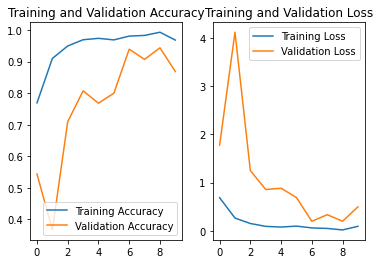

In [121]:
performanceGraph()

In [19]:
#This saves the state of the Model we Trained
import os.path

if os.path.isfile('models/mobnet.h5') is False:
    model.save('models/mobnet.h5')#Saves the architecture as well as weights and biases
if os.path.isfile('models/mobnet_weights.h5') is False:
    model.save_weights('models/mobnet_weights.h5')#Only saves the weight and biases

In [1]:
#This is the test for inference on the model
import random
#'images/Set1/1.57-Red_Deer/SEQ79911/SEQ79911_IMG_0003.JPG'
class_names = train_dataset.class_names

img = tf.keras.utils.load_img(
    'testimages/wtd.jpg', target_size=(224,224)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

NameError: name 'train_dataset' is not defined

In [111]:
#Script to see out Dataset
import matplotlib.pyplot as plt
def display(display_list):
    plt.figure(figsize = (20,20))
    for images,labels in display_list.take(1):
        for i in range(9):
            plt.subplot(3,3,i+1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.axis("off")

In [112]:
prediction = tf.keras.preprocessing.image_dataset_from_directory(f"images/Set1/{class_names[np.argmax(score)]}")

Found 700 files belonging to 87 classes.


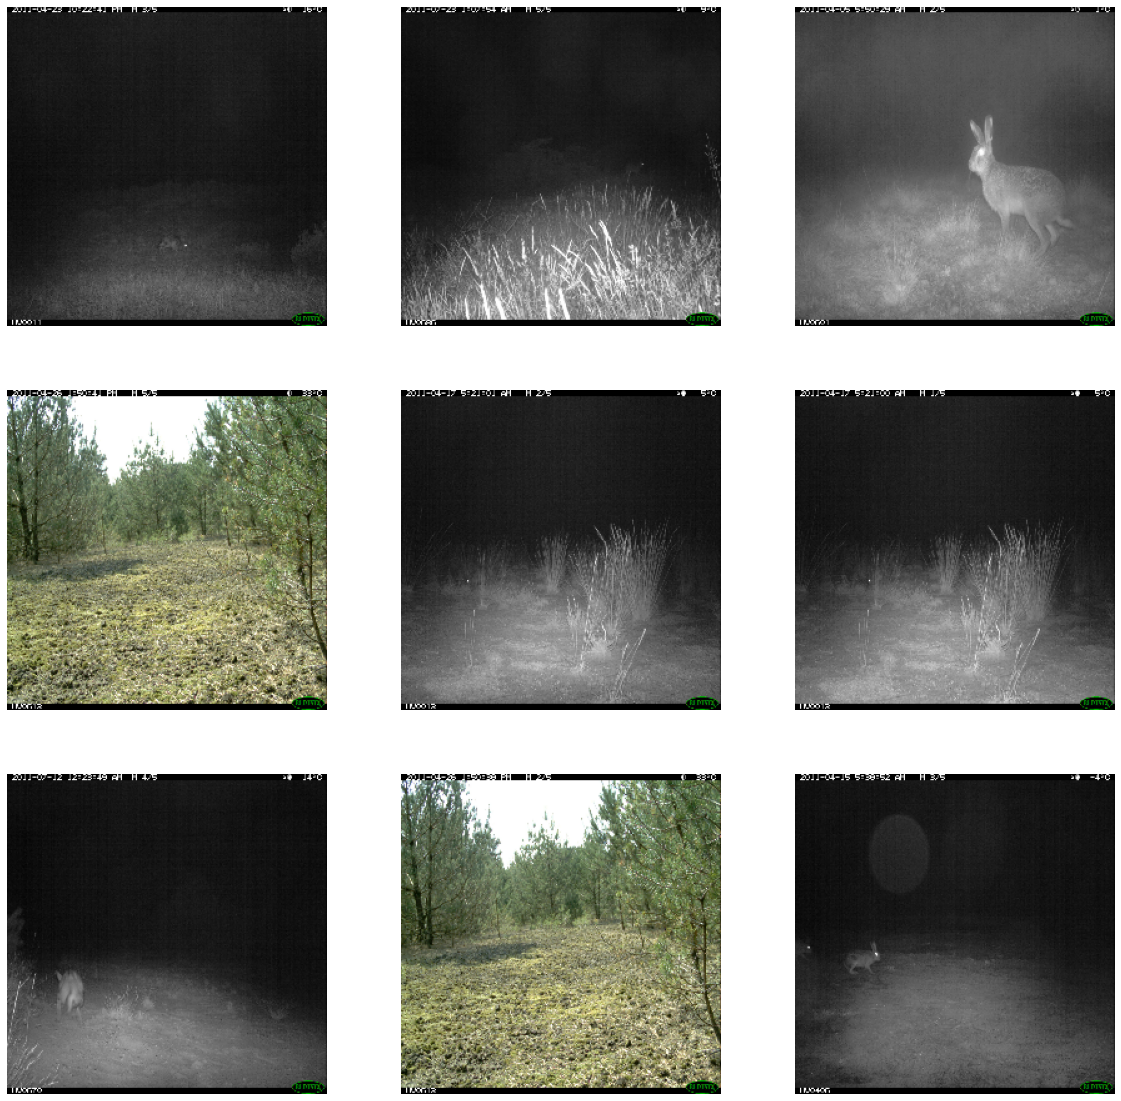

In [113]:
display(prediction)